# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [4]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Libraries for data preparation and model building
import matplotlib.pyplot as plt

# Setting global constants to ensure notebook results are reproducible
PARAMETER_CONSTANT = 42

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [6]:
df = pd.read_csv("../Time Series Project/df_train.csv")

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [8]:
df['Valencia_wind_deg'] = df['Valencia_wind_deg'].str.extract(r'(\d+)').astype(float)
df['Seville_pressure'] = df['Seville_pressure'].str.extract(r'(\d+)').astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   float64
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

In [9]:
df.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,5.0,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,10.0,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,9.0,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,8.0,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,7.0,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [10]:
df['time'] = pd.to_datetime(df['time'])  # Konwersja na format datetime
df.set_index('time', inplace=True)  # Ustawienie indeksu czasowego

In [11]:
print(df.index.to_series().diff().value_counts())  # Sprawdzanie odstępów czasowych

time
0 days 03:00:00    8760
0 days 09:00:00       2
Name: count, dtype: int64


In [12]:
df_resampled = df.resample('3H').asfreq()  # Tworzenie pełnego zakresu czasowego
df_interpolated = df_resampled.interpolate(method='linear')

C:\Users\Ester\AppData\Local\Temp\ipykernel_10104\3160060319.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_resampled = df.resample('3H').asfreq()  # Tworzenie pełnego zakresu czasowego


In [13]:
# Resampling do dziennych średnich
df_daily = pd.DataFrame(df_interpolated['load_shortfall_3h'].resample('D').mean())
df_monthly = pd.DataFrame(df_interpolated['load_shortfall_3h'].resample('M').mean())

C:\Users\Ester\AppData\Local\Temp\ipykernel_10104\3768631530.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = pd.DataFrame(df_interpolated['load_shortfall_3h'].resample('M').mean())


In [15]:
# plot relevant feature interactions

### Korelacje

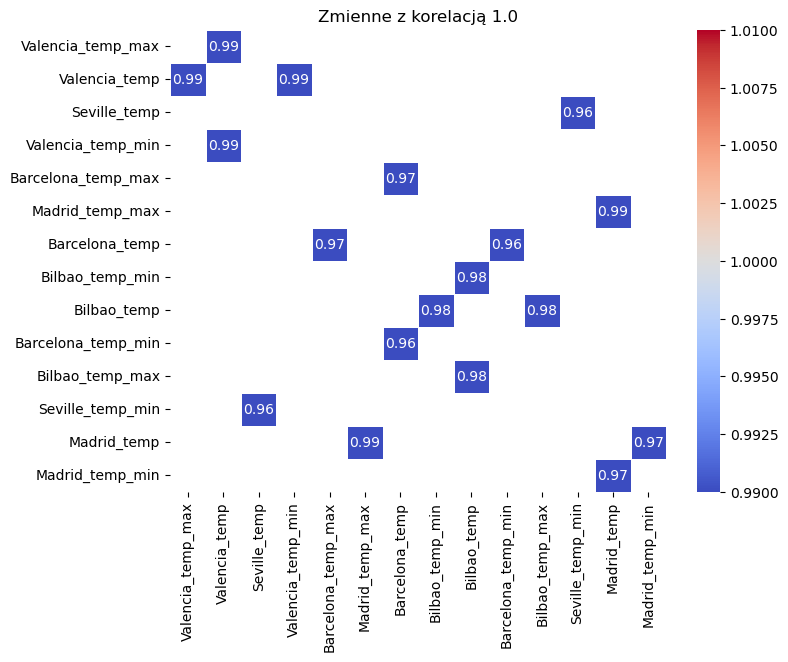

In [17]:
# evaluate correlation
# Obliczenie macierzy korelacji
import seaborn as sns
corr_matrix = df_interpolated.corr()

# Filtrowanie tylko wartości równych 1 (poza przekątną)
perfect_corr = corr_matrix[(corr_matrix >= 0.95) & (corr_matrix != np.eye(len(corr_matrix)))]


# Usunięcie pustych wierszy/kolumn
perfect_corr.dropna(how='all', inplace=True)
perfect_corr = perfect_corr.dropna(how='all', axis=1)

# Sprawdzenie, czy są jakiekolwiek idealne korelacje
if not perfect_corr.empty:
    plt.figure(figsize=(8, 6))
    sns.heatmap(perfect_corr, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f", vmin=0.99, vmax=1.01)
    plt.title("Zmienne z korelacją 1.0")
    plt.show()
else:
    print("Brak idealnych korelacji między różnymi zmiennymi.")


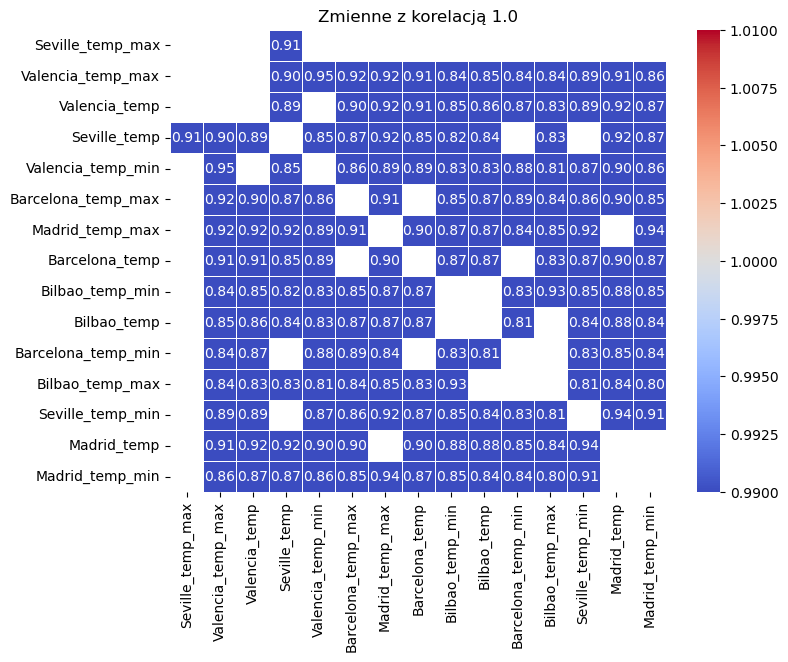

In [18]:
# Obliczenie macierzy korelacji
corr_matrix = df_interpolated.corr()

# Filtrowanie tylko wartości równych 1 (poza przekątną)
perfect_corr = corr_matrix[(corr_matrix <= 0.95) & (corr_matrix >= 0.8) & (corr_matrix != np.eye(len(corr_matrix)))]

# Usunięcie pustych wierszy/kolumn
perfect_corr.dropna(how='all', inplace=True)
perfect_corr = perfect_corr.dropna(how='all', axis=1)

# Sprawdzenie, czy są jakiekolwiek idealne korelacje
if not perfect_corr.empty:
    plt.figure(figsize=(8, 6))
    sns.heatmap(perfect_corr, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f", vmin=0.99, vmax=1.01)
    plt.title("Zmienne z korelacją 1.0")
    plt.show()
else:
    print("Brak idealnych korelacji między różnymi zmiennymi.")

In [19]:
df_interpolated.filter(like='Madrid').describe()

,Madrid_wind_speed,Madrid_humidity,Madrid_clouds_all,Madrid_rain_1h,Madrid_weather_id,Madrid_pressure,Madrid_temp_max,Madrid_temp,Madrid_temp_min
count,8767.000000,8767.000000,8767.000000,8767.000000,8767.000000,8767.000000,8767.000000,8767.000000,8767.000000
mean,2.426258,57.419433,19.468081,0.037801,773.539862,1010.294152,289.534928,288.414570,287.197889
std,1.850771,24.330949,28.048921,0.152606,77.297807,22.219508,9.753151,9.347522,9.206432
min,0.000000,6.333333,0.000000,0.000000,211.000000,927.666667,264.983333,264.983333,264.983333
25%,1.000000,36.333333,0.000000,0.000000,800.000000,1012.333333,282.150000,281.395661,280.270000
50%,2.000000,58.000000,0.000000,0.000000,800.000000,1017.333333,288.108333,287.051000,286.069000
75%,3.333333,78.666667,33.333333,0.000000,800.666667,1022.000000,296.816667,295.153333,293.883333
max,13.000000,100.000000,100.000000,3.000000,804.000000,1038.000000,314.483333,313.133333,310.383333


In [20]:
df_interpolated.filter(like='Barcelona').describe()

,Barcelona_wind_speed,Barcelona_wind_deg,Barcelona_rain_1h,Barcelona_pressure,Barcelona_rain_3h,Barcelona_weather_id,Barcelona_temp_max,Barcelona_temp,Barcelona_temp_min
count,8767.000000,8767.000000,8767.000000,8.767000e+03,8767.000000,8767.000000,8767.000000,8767.000000,8767.000000
mean,2.870328,190.559846,0.128847,1.377798e+03,0.000439,765.995399,291.154626,289.853036,288.445641
std,1.791825,89.063820,0.634591,1.406993e+04,0.003993,88.125192,7.273457,6.527838,6.102016
min,0.000000,0.000000,0.000000,6.706667e+02,0.000000,200.666667,272.150000,270.816667,269.483333
25%,1.666667,118.333333,0.000000,1.014000e+03,0.000000,800.000000,285.483333,284.972693,284.150000
50%,2.666667,200.000000,0.000000,1.018000e+03,0.000000,800.333333,290.150000,289.406667,288.150000
75%,4.000000,260.000000,0.000000,1.022000e+03,0.000000,801.000000,296.853333,294.907333,292.966667
max,12.666667,360.000000,12.000000,1.001411e+06,0.093000,804.000000,314.076667,307.316667,304.816667


In [21]:
df_interpolated.filter(like='Seville').describe()

,Seville_humidity,Seville_clouds_all,Seville_wind_speed,Seville_pressure,Seville_rain_1h,Seville_rain_3h,Seville_weather_id,Seville_temp_max,Seville_temp,Seville_temp_min
count,8767.000000,8767.000000,8767.000000,8767.000000,8767.000000,8767.000000,8767.000000,8767.000000,8767.000000,8767.000000
mean,62.669594,13.730999,2.424851,13.512148,0.039443,0.000242,774.648404,297.473050,293.974022,291.629546
std,22.622123,24.290299,1.672574,7.239270,0.175817,0.003659,71.926160,8.878983,7.922493,8.178318
min,8.333333,0.000000,0.000000,1.000000,0.000000,0.000000,200.000000,272.063000,272.063000,270.150000
25%,44.333333,0.000000,1.000000,7.000000,0.000000,0.000000,800.000000,291.298385,288.278333,285.816667
50%,65.666667,0.000000,2.000000,14.000000,0.000000,0.000000,800.000000,297.094000,293.320000,290.816667
75%,82.000000,20.000000,3.333333,20.000000,0.000000,0.000000,800.000000,304.150000,299.618333,297.150000
max,100.000000,97.333333,11.666667,25.000000,3.000000,0.093333,804.000000,320.483333,314.976667,314.816667


In [22]:
df_interpolated.filter(like='Valencia').describe()

,Valencia_wind_deg,Valencia_wind_speed,Valencia_snow_3h,Valencia_pressure,Valencia_temp_max,Valencia_temp,Valencia_humidity,Valencia_temp_min
count,8767.000000,8767.000000,8767.000000,8767.000000,8767.000000,8767.000000,8767.000000,8767.000000
mean,5.277632,2.587221,0.000205,1013.801547,291.332433,290.587692,65.247766,289.863518
std,2.877754,2.412610,0.011863,9.171583,7.567372,7.163756,19.259971,6.908607
min,1.000000,0.000000,0.000000,972.666667,269.888000,269.888000,10.333333,269.888000
25%,3.000000,1.000000,0.000000,1012.000000,285.543000,285.150000,51.333333,284.767667
50%,5.000000,1.666667,0.000000,1016.666667,291.028833,290.166667,67.000000,289.548333
75%,8.000000,3.666667,0.000000,1020.149074,297.236667,296.051667,81.333333,294.820000
max,10.000000,52.000000,0.791667,1021.666667,314.263333,310.426667,100.000000,310.272000


In [23]:
df_interpolated.filter(like='Bilbao').describe()

,Bilbao_rain_1h,Bilbao_clouds_all,Bilbao_wind_speed,Bilbao_wind_deg,Bilbao_snow_3h,Bilbao_pressure,Bilbao_weather_id,Bilbao_temp_min,Bilbao_temp,Bilbao_temp_max
count,8767.000000,8767.000000,8767.000000,8767.000000,8767.000000,8767.000000,8767.000000,8767.000000,8767.000000,8767.000000
mean,0.136295,43.472187,1.850272,158.996084,0.032063,1017.740276,724.688763,285.014069,286.418383,287.960778
std,0.376744,32.556207,1.695644,102.056695,0.557236,10.045112,115.874648,6.706653,6.820467,7.108237
min,0.000000,0.000000,0.000000,0.000000,0.000000,971.333333,207.333333,264.483333,267.483333,269.063000
25%,0.000000,10.000000,0.666667,73.333333,0.000000,1013.000000,700.333333,280.069031,281.366750,282.820833
50%,0.000000,45.000000,1.000000,147.000000,0.000000,1019.000000,800.000000,284.816667,286.150000,287.628500
75%,0.100000,75.000000,2.666667,234.000000,0.000000,1024.000000,801.666667,289.816667,291.032339,292.483333
max,3.000000,100.000000,12.666667,359.333333,21.300000,1042.000000,804.000000,309.816667,310.710000,317.966667


### Analiza sezonowości

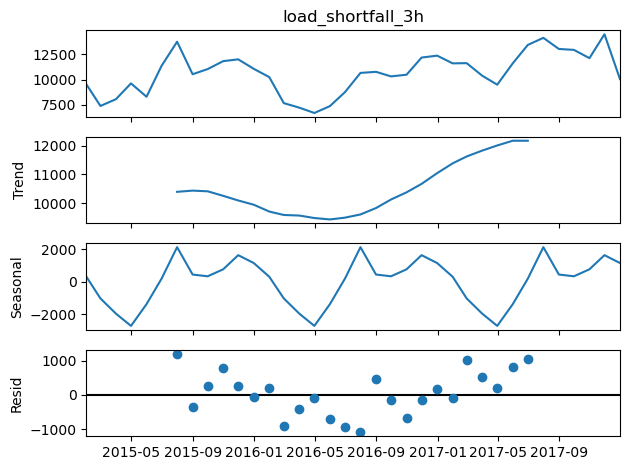

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_monthly['load_shortfall_3h'], model='additive', period=12)

# Wyniki dekompozycji
result.plot()
plt.show()

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [27]:
# remove missing values/ features

In [28]:
# create new features

In [29]:
# engineer existing features


## Podział kolumny weather_id

In [31]:
cities = ['Seville', 'Barcelona', 'Madrid', 'Bilbao']
for city in cities:
    col = f'{city}_weather_id'
    df_interpolated[f'{city}_storm'] = df_interpolated[col].between(200, 232).astype(int)
    df_interpolated[f'{city}_drizzle'] = df_interpolated[col].between(300, 321).astype(int)
    df_interpolated[f'{city}_rain'] = df_interpolated[col].between(500, 531).astype(int)
    df_interpolated[f'{city}_snow'] = df_interpolated[col].between(600, 622).astype(int)
    df_interpolated[f'{city}_clear'] = (df_interpolated[col] == 800).astype(int)
    df_interpolated[f'{city}_clouds'] = df_interpolated[col].between(801, 804).astype(int)

In [32]:
df_interpolated.head()

,Unnamed: 0,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,...,Madrid_rain,Madrid_snow,Madrid_clear,Madrid_clouds,Bilbao_storm,Bilbao_drizzle,Bilbao_rain,Bilbao_snow,Bilbao_clear,Bilbao_clouds
time,,,,,,,,,,,,,,,,,,,,,
2015-01-01 03:00:00,0.0,0.666667,5.0,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,...,0,0,1,0,0,0,0,0,1,0
2015-01-01 06:00:00,1.0,0.333333,10.0,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,...,0,0,1,0,0,0,0,0,1,0
2015-01-01 09:00:00,2.0,1.000000,9.0,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,...,0,0,1,0,0,0,0,0,1,0
2015-01-01 12:00:00,3.0,1.000000,8.0,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,...,0,0,1,0,0,0,0,0,1,0
2015-01-01 15:00:00,4.0,1.000000,7.0,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,...,0,0,1,0,0,0,0,0,1,0


<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [91]:
# split data
df_selected = df_interpolated.drop(["Bilbao_weather_id", "Unnamed: 0", "Barcelona_weather_id", "Seville_weather_id", "Madrid_weather_id", "Barcelona_pressure"], axis=1)
df_selected.shape

(8767, 66)

In [93]:
#Train one or more ML models

In [ ]:
# evaluate one or more ML models

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
# Compare model performance

In [ ]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic